## Lectura de datos

In [1]:
from pyspark.sql.functions import *
import numpy as np
import pandas as pd

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

In [4]:
PATH_DATA = "C:/Users/Acer/Desktop/Proyecto/Jupyter"

In [5]:
df = spark.read.csv(PATH_DATA + '/titanic.csv', sep=',', header=True, inferSchema=True)

## Comprobar lectura correcta del dataset

In [6]:
df.show()

+--------+------+--------------------+------+----+-----------------------+-----------------------+-------+
|Survived|Pclass|                Name|   Sex| Age|Siblings/Spouses Aboard|Parents/Children Aboard|   Fare|
+--------+------+--------------------+------+----+-----------------------+-----------------------+-------+
|       0|     3|Mr. Owen Harris B...|  male|22.0|                      1|                      0|   7.25|
|       1|     1|Mrs. John Bradley...|female|38.0|                      1|                      0|71.2833|
|       1|     3|Miss. Laina Heikk...|female|26.0|                      0|                      0|  7.925|
|       1|     1|Mrs. Jacques Heat...|female|35.0|                      1|                      0|   53.1|
|       0|     3|Mr. William Henry...|  male|35.0|                      0|                      0|   8.05|
|       0|     3|     Mr. James Moran|  male|27.0|                      0|                      0| 8.4583|
|       0|     1|Mr. Timothy J McC...

In [7]:
df.printSchema()

root
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Siblings/Spouses Aboard: integer (nullable = true)
 |-- Parents/Children Aboard: integer (nullable = true)
 |-- Fare: double (nullable = true)



In [8]:
df.count()

887

In [9]:
df.describe().show()

+-------+-------------------+------------------+--------------------+------+------------------+-----------------------+-----------------------+-----------------+
|summary|           Survived|            Pclass|                Name|   Sex|               Age|Siblings/Spouses Aboard|Parents/Children Aboard|             Fare|
+-------+-------------------+------------------+--------------------+------+------------------+-----------------------+-----------------------+-----------------+
|  count|                887|               887|                 887|   887|               887|                    887|                    887|              887|
|   mean| 0.3855693348365276| 2.305524239007892|                NULL|  NULL|29.471443066516347|     0.5253664036076663|     0.3833145434047351|32.30542018038328|
| stddev|0.48700411775101266|0.8366620036697728|                NULL|  NULL|14.121908405462552|      1.104668553867569|     0.8074659070316833|49.78204040017391|
|    min|                  0

In [10]:
df.select("Survived").show()

+--------+
|Survived|
+--------+
|       0|
|       1|
|       1|
|       1|
|       0|
|       0|
|       0|
|       0|
|       1|
|       1|
|       1|
|       1|
|       0|
|       0|
|       0|
|       1|
|       0|
|       1|
|       0|
|       1|
+--------+
only showing top 20 rows



In [11]:
df.groupBy("Survived").count().show()

+--------+-----+
|Survived|count|
+--------+-----+
|       1|  342|
|       0|  545|
+--------+-----+



## Comprobar dimensiones del dataset

### Check dataset dimensions

In [12]:
# Número de filas
num_rows = df.count()
print(f"Número de filas: {num_rows}")

Número de filas: 887


In [13]:
# Número de columnas
num_columns = len(df.columns)
print(f"Número de columnas: {num_columns}")

Número de columnas: 8


### Estudiar balanceo del dataset (sobre la variable target)

In [14]:
# Contar la cantidad de sobrevivientes (Survived = 1) y no sobrevivientes (Survived = 0)
survived_count = df.filter(df["Survived"] == 1).count()
not_survived_count = df.filter(df["Survived"] == 0).count()

In [15]:
# Imprimir los resultados
print(f"Cantidad de sobrevivientes: {survived_count}")
print(f"Cantidad de no sobrevivientes: {not_survived_count}")

Cantidad de sobrevivientes: 342
Cantidad de no sobrevivientes: 545


In [16]:
# Calcular la proporción de sobrevivientes y no sobrevivientes en el dataset
survival_ratio = survived_count / num_rows
not_survival_ratio = not_survived_count / num_rows

print(f"Proporción de sobrevivientes: {survival_ratio:.2%}")
print(f"Proporción de no sobrevivientes: {not_survival_ratio:.2%}")

Proporción de sobrevivientes: 38.56%
Proporción de no sobrevivientes: 61.44%


# Data Wrangling

### Estudio de los formatos de las variables

In [17]:
#Exploración inicial del dataset
# Ver las primeras filas del dataset
df.show()

# Obtener información sobre el esquema de las columnas
df.printSchema()

# Resumen estadístico de las columnas numéricas
df.describe().show()

+--------+------+--------------------+------+----+-----------------------+-----------------------+-------+
|Survived|Pclass|                Name|   Sex| Age|Siblings/Spouses Aboard|Parents/Children Aboard|   Fare|
+--------+------+--------------------+------+----+-----------------------+-----------------------+-------+
|       0|     3|Mr. Owen Harris B...|  male|22.0|                      1|                      0|   7.25|
|       1|     1|Mrs. John Bradley...|female|38.0|                      1|                      0|71.2833|
|       1|     3|Miss. Laina Heikk...|female|26.0|                      0|                      0|  7.925|
|       1|     1|Mrs. Jacques Heat...|female|35.0|                      1|                      0|   53.1|
|       0|     3|Mr. William Henry...|  male|35.0|                      0|                      0|   8.05|
|       0|     3|     Mr. James Moran|  male|27.0|                      0|                      0| 8.4583|
|       0|     1|Mr. Timothy J McC...

In [18]:
# Análisis de la variable objetivo (Survived)
# Contar la cantidad de sobrevivientes y no sobrevivientes
survived_count = df.filter(df["Survived"] == 1).count()
not_survived_count = df.filter(df["Survived"] == 0).count()

print(f"Cantidad de sobrevivientes: {survived_count}")
print(f"Cantidad de no sobrevivientes: {not_survived_count}")

Cantidad de sobrevivientes: 342
Cantidad de no sobrevivientes: 545


In [19]:
# Análisis de las variables categóricas
# Contar los valores únicos en las variables categóricas (por ejemplo, Pclass)
df.select("Pclass").distinct().show()

+------+
|Pclass|
+------+
|     1|
|     3|
|     2|
+------+



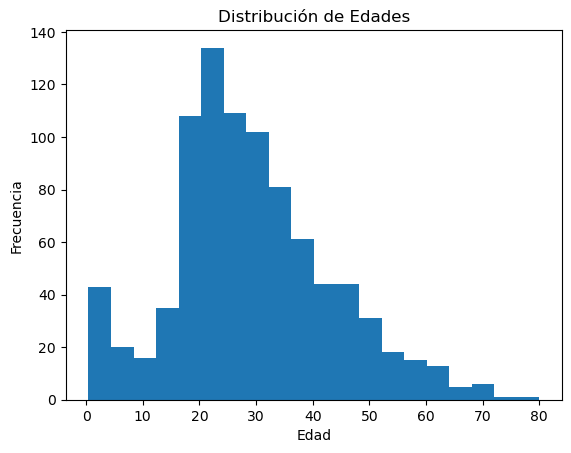

In [20]:
#Análisis de las variables numéricas
# Histograma de la edad
import matplotlib.pyplot as plt

age_data = df.select("Age").filter(df["Age"].isNotNull()).toPandas()
plt.hist(age_data["Age"], bins=20)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de Edades")
plt.show()

In [21]:
#Análisis de relaciones entre variables
# Correlación entre Pclass y Fare
df.select(corr("Pclass", "Fare")).show()

# Tabla de contingencia entre Pclass y Survived
df.crosstab("Pclass", "Survived").show()

+------------------+
|corr(Pclass, Fare)|
+------------------+
|-0.548919355485448|
+------------------+

+---------------+---+---+
|Pclass_Survived|  0|  1|
+---------------+---+---+
|              3|368|119|
|              1| 80|136|
|              2| 97| 87|
+---------------+---+---+



### Comprobación y eliminación de registros repetidos

In [22]:
# Contar la cantidad de registros duplicados en el DataFrame
duplicates_count = df.count() - df.dropDuplicates().count()
print(f"Cantidad de registros duplicados: {duplicates_count}")

Cantidad de registros duplicados: 0


In [23]:
# Eliminar registros duplicados y crear un nuevo DataFrame sin duplicados
df_sin_duplicados = df.dropDuplicates()

In [24]:
# Reemplazar el DataFrame original con el nuevo DataFrame sin duplicados
df = df_sin_duplicados
df.show()

+--------+------+--------------------+------+----+-----------------------+-----------------------+-------+
|Survived|Pclass|                Name|   Sex| Age|Siblings/Spouses Aboard|Parents/Children Aboard|   Fare|
+--------+------+--------------------+------+----+-----------------------+-----------------------+-------+
|       0|     3|Mr. William John ...|  male|30.0|                      0|                      0|   8.05|
|       0|     2|   Mr. Emile Richard|  male|23.0|                      0|                      0|15.0458|
|       0|     3|Miss. Jeannie Lef...|female| 8.0|                      3|                      1|25.4667|
|       1|     1|  Mr. George Bradley|  male|37.0|                      0|                      0|  26.55|
|       0|     1|Mr. Charles H Har...|  male|37.0|                      0|                      0|   42.4|
|       0|     2|Mr. Ennis Hasting...|  male|19.0|                      0|                      0|    0.0|
|       0|     1|Capt. Edward Giff...